<a href="https://colab.research.google.com/github/dharalakshmi/Tourisms-Recomandation/blob/main/Complete%20code%20till%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy matplotlib seaborn plotly openpyxl scikit-learn scipy -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score, classification_report
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("🚀 COMPLETE TOURISM ANALYTICS WITH FULL PREPROCESSING")
print("="*80)

🚀 COMPLETE TOURISM ANALYTICS WITH FULL PREPROCESSING


In [3]:
# STEP 0: Upload the datasets manually in Colab
from google.colab import files
import pandas as pd

print("📁 Please select all 3 dataset files to upload:")
uploaded = files.upload()  # Opens file picker — select all 3 Excel or CSV files

📁 Please select all 3 dataset files to upload:


Saving FINAL_1_COMPANY_INFO_CORRECTED.xlsx to FINAL_1_COMPANY_INFO_CORRECTED.xlsx
Saving FINAL_3_MARKET_TRENDS_CORRECTED.xlsx to FINAL_3_MARKET_TRENDS_CORRECTED.xlsx
Saving FINAL_2_GEOSPATIAL_POI_CORRECTED.xlsx to FINAL_2_GEOSPATIAL_POI_CORRECTED.xlsx


In [4]:
print("\n📂 STEP 1: Loading Datasets...")

df_company = pd.read_excel('FINAL_1_COMPANY_INFO_CORRECTED.xlsx')
df_geo = pd.read_excel('FINAL_2_GEOSPATIAL_POI_CORRECTED.xlsx')
df_market = pd.read_excel('FINAL_3_MARKET_TRENDS_CORRECTED.xlsx')

print(f"✅ Sheet 1: {df_company.shape}")
print(f"✅ Sheet 2: {df_geo.shape}")
print(f"✅ Sheet 3: {df_market.shape}")



📂 STEP 1: Loading Datasets...
✅ Sheet 1: (5000, 21)
✅ Sheet 2: (5000, 19)
✅ Sheet 3: (5000, 14)


In [5]:
# ============================================================================
# STEP 2: CLEAN COLUMN NAMES & REMOVE EMPTY COLUMNS
# ============================================================================
print("\n" + "="*80)
print("🧹 STEP 2: DATA CLEANING - COLUMNS")
print("="*80)

def clean_dataframe(df, name):
    """Remove unnamed/empty columns and clean column names"""
    print(f"\n📋 Cleaning {name}:")

    # Remove completely empty columns
    empty_cols = df.columns[df.isnull().all()].tolist()
    if empty_cols:
        print(f"   🗑️  Removing {len(empty_cols)} empty columns: {empty_cols}")
        df = df.drop(columns=empty_cols)

    # Remove unnamed columns
    unnamed_cols = [col for col in df.columns if 'Unnamed' in str(col)]
    if unnamed_cols:
        print(f"   🗑️  Removing {len(unnamed_cols)} unnamed columns: {unnamed_cols}")
        df = df.drop(columns=unnamed_cols)

    # Strip whitespace from column names
    df.columns = df.columns.str.strip()

    print(f"   ✅ Final shape: {df.shape}")
    return df

df_company = clean_dataframe(df_company, "Company Info")
df_geo = clean_dataframe(df_geo, "Geospatial POI")
df_market = clean_dataframe(df_market, "Market Trends")




🧹 STEP 2: DATA CLEANING - COLUMNS

📋 Cleaning Company Info:
   ✅ Final shape: (5000, 21)

📋 Cleaning Geospatial POI:
   ✅ Final shape: (5000, 19)

📋 Cleaning Market Trends:
   🗑️  Removing 1 empty columns: ['  ']
   ✅ Final shape: (5000, 13)


In [6]:
# ============================================================================
# STEP 2.1 : DATA QUALITY ASSESSMENT
# ============================================================================
print("\n" + "="*80)
print("🔍 STEP 2.1: DATA QUALITY ASSESSMENT")
print("="*80)

def assess_data_quality(df, name):
    """Comprehensive data quality check"""
    print(f"\n📊 {name}:")
    print(f"   Rows: {len(df):,}")
    print(f"   Columns: {df.shape[1]}")

    # Check missing values
    missing = df.isnull().sum()
    total_missing = missing.sum()

    if total_missing > 0:
        print(f"\n   ⚠️  Missing Values Found: {total_missing} total")
        missing_cols = missing[missing > 0]
        for col, count in missing_cols.items():
            pct = (count / len(df)) * 100
            print(f"      • {col}: {count} ({pct:.2f}%)")
    else:
        print(f"   ✅ No missing values")

    # Check duplicates
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"   ⚠️  Duplicate rows: {duplicates}")
    else:
        print(f"   ✅ No duplicates")

    # Check data types
    print(f"\n   📋 Data Types:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"      • {dtype}: {count} columns")

    return total_missing

total_missing = 0
total_missing += assess_data_quality(df_company, "COMPANY INFO")
total_missing += assess_data_quality(df_geo, "GEOSPATIAL POI")
total_missing += assess_data_quality(df_market, "MARKET TRENDS")

print(f"\n{'✅ EXCELLENT' if total_missing == 0 else '⚠️ NEEDS TREATMENT'}: Total missing = {total_missing}")



🔍 STEP 2.1: DATA QUALITY ASSESSMENT

📊 COMPANY INFO:
   Rows: 5,000
   Columns: 21
   ✅ No missing values
   ✅ No duplicates

   📋 Data Types:
      • float64: 11 columns
      • object: 7 columns
      • int64: 3 columns

📊 GEOSPATIAL POI:
   Rows: 5,000
   Columns: 19
   ✅ No missing values
   ✅ No duplicates

   📋 Data Types:
      • float64: 10 columns
      • object: 8 columns
      • int64: 1 columns

📊 MARKET TRENDS:
   Rows: 5,000
   Columns: 13
   ✅ No missing values
   ✅ No duplicates

   📋 Data Types:
      • object: 7 columns
      • float64: 5 columns
      • int64: 1 columns

✅ EXCELLENT: Total missing = 0


In [7]:
print("\n" + "="*80)
print("🔗 STEP 3: RELATIONAL INTEGRITY CHECK")
print("="*80)

poi_company = set(df_company['POI_ID'])
poi_geo = set(df_geo['POI_ID'])
poi_market = set(df_market['POI_ID'])

print(f"POI_ID counts:")
print(f"  Company: {len(poi_company):,}")
print(f"  Geospatial: {len(poi_geo):,}")
print(f"  Market: {len(poi_market):,}")

common = poi_company & poi_geo & poi_market
print(f"\n✅ Common POI_IDs: {len(common):,}")

if len(common) == len(poi_company) == len(poi_geo) == len(poi_market):
    print("✅ PERFECT MATCH - All POI_IDs align!")
else:
    print("⚠️ Mismatch detected:")
    print(f"   Missing in Geo: {len(poi_company - poi_geo)}")
    print(f"   Missing in Market: {len(poi_company - poi_market)}")


🔗 STEP 3: RELATIONAL INTEGRITY CHECK
POI_ID counts:
  Company: 5,000
  Geospatial: 5,000
  Market: 5,000

✅ Common POI_IDs: 5,000
✅ PERFECT MATCH - All POI_IDs align!


In [8]:
# ============================================================================
# STEP 4: RELATIONAL INTEGRITY CHECK
# ============================================================================
print("\n" + "="*80)
print("🔗 STEP 4: RELATIONAL INTEGRITY CHECK")
print("="*80)

poi_company = set(df_company['POI_ID'])
poi_geo = set(df_geo['POI_ID'])
poi_market = set(df_market['POI_ID'])

print(f"\nPOI_ID Distribution:")
print(f"   Company Info: {len(poi_company):,} unique IDs")
print(f"   Geospatial POI: {len(poi_geo):,} unique IDs")
print(f"   Market Trends: {len(poi_market):,} unique IDs")

common_ids = poi_company & poi_geo & poi_market
print(f"\n   ✅ Common POI_IDs across all sheets: {len(common_ids):,}")

if len(common_ids) == len(poi_company) == len(poi_geo) == len(poi_market):
    print("   🎉 PERFECT MATCH - All POI_IDs align perfectly!")
else:
    print("   ⚠️  Mismatch detected:")
    missing_geo = poi_company - poi_geo
    missing_market = poi_company - poi_market
    if missing_geo:
        print(f"      • Missing in Geospatial: {len(missing_geo)}")
    if missing_market:
        print(f"      • Missing in Market: {len(missing_market)}")


🔗 STEP 4: RELATIONAL INTEGRITY CHECK

POI_ID Distribution:
   Company Info: 5,000 unique IDs
   Geospatial POI: 5,000 unique IDs
   Market Trends: 5,000 unique IDs

   ✅ Common POI_IDs across all sheets: 5,000
   🎉 PERFECT MATCH - All POI_IDs align perfectly!


In [9]:
# ============================================================================
# STEP 5: MERGE DATASETS
# ============================================================================
print("\n" + "="*80)
print("🔄 STEP 5: MERGING DATASETS")
print("="*80)

print("\nMerging strategy: INNER JOIN on POI_ID")

df = df_company.merge(df_geo, on='POI_ID', how='inner', suffixes=('', '_geo'))
print(f"   After Company + Geo: {df.shape}")

df = df.merge(df_market, on='POI_ID', how='inner', suffixes=('', '_market'))
print(f"   After adding Market: {df.shape}")

# Remove duplicate columns with suffixes
duplicate_cols = [col for col in df.columns if col.endswith('_geo') or col.endswith('_market')]
if duplicate_cols:
    print(f"\n   🗑️  Removing {len(duplicate_cols)} duplicate columns")
    df = df.drop(columns=duplicate_cols)

print(f"\n✅ Final merged dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")


🔄 STEP 5: MERGING DATASETS

Merging strategy: INNER JOIN on POI_ID
   After Company + Geo: (5000, 39)
   After adding Market: (5000, 51)

   🗑️  Removing 1 duplicate columns

✅ Final merged dataset: 5,000 rows × 50 columns


In [10]:
# ============================================================================
# STEP 6: HANDLE MISSING VALUES
# ============================================================================
print("\n" + "="*80)
print("🔧 STEP 6: HANDLING MISSING VALUES")
print("="*80)

missing_summary = df.isnull().sum()
missing_total = missing_summary.sum()

print(f"\nTotal missing values in merged dataset: {missing_total}")

if missing_total > 0:
    print("\n📊 Missing Value Treatment:")

    # Separate numeric and categorical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Handle numeric columns - fill with median
    for col in numeric_cols:
        if df[col].isnull().any():
            median_val = df[col].median()
            missing_count = df[col].isnull().sum()
            df[col].fillna(median_val, inplace=True)
            print(f"   ✅ {col}: Filled {missing_count} with median ({median_val:.2f})")

    # Handle categorical columns - fill with mode
    for col in categorical_cols:
        if df[col].isnull().any():
            mode_val = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
            missing_count = df[col].isnull().sum()
            df[col].fillna(mode_val, inplace=True)
            print(f"   ✅ {col}: Filled {missing_count} with mode ({mode_val})")

    print(f"\n✅ All missing values handled")
else:
    print("✅ No missing values to handle")



🔧 STEP 6: HANDLING MISSING VALUES

Total missing values in merged dataset: 0
✅ No missing values to handle


In [11]:
# ============================================================================
# STEP 7: GEOGRAPHIC LOGIC VALIDATION & FIXES
# ============================================================================
print("\n" + "="*80)
print("🌊 STEP 7: GEOGRAPHIC LOGIC VALIDATION")
print("="*80)

# Define geographic constraints
CRUISE_ALLOWED_REGIONS = ['Coastal', 'Island']
COASTAL_COUNTRIES = {'UAE', 'Thailand', 'Singapore', 'Spain', 'Italy',
                     'Turkey', 'Indonesia', 'Australia', 'United States',
                     'France', 'United Kingdom', 'Maldives'}

print(f"\n📋 Geographic Rules:")
print(f"   • Cruise travel allowed ONLY in: {CRUISE_ALLOWED_REGIONS}")
print(f"   • Coastal countries: {len(COASTAL_COUNTRIES)}")

# Check current cruise distribution
print(f"\n🚢 BEFORE FIX - Cruise Travel Analysis:")
cruise_before = df[df['Travel_mode'] == 'Cruise']
print(f"   Total cruise bookings: {len(cruise_before):,}")

if len(cruise_before) > 0:
    cruise_region_dist = cruise_before['Region_type'].value_counts()
    print(f"\n   Region Distribution:")
    for region, count in cruise_region_dist.items():
        valid = "✅" if region in CRUISE_ALLOWED_REGIONS else "❌"
        print(f"      {valid} {region}: {count:,}")

    # Count invalid cruises
    invalid_cruises = cruise_before[~cruise_before['Region_type'].isin(CRUISE_ALLOWED_REGIONS)]
    print(f"\n   ⚠️  Invalid cruises found: {len(invalid_cruises):,}")

# Fix cruise travel mode
def fix_travel_mode_geographic(row):
    """
    Enforce strict geographic logic:
    - Cruise ONLY for Coastal/Island regions
    - Appropriate alternatives for other regions
    """
    if row['Travel_mode'] == 'Cruise':
        if row['Region_type'] not in CRUISE_ALLOWED_REGIONS:
            # Replace with geographically appropriate mode
            if row['Region_type'] == 'Urban':
                return np.random.choice(['Flight', 'Train', 'Car'], p=[0.5, 0.3, 0.2])
            elif row['Region_type'] == 'Historical':
                return np.random.choice(['Flight', 'Train', 'Bus'], p=[0.4, 0.3, 0.3])
            else:  # Nature/Mountain
                return np.random.choice(['Flight', 'Car', 'Bus'], p=[0.5, 0.3, 0.2])

    return row['Travel_mode']

print(f"\n🔧 Applying geographic fixes...")
df['Travel_mode'] = df.apply(fix_travel_mode_geographic, axis=1)

# Verify fix
print(f"\n🚢 AFTER FIX - Cruise Travel Analysis:")
cruise_after = df[df['Travel_mode'] == 'Cruise']
print(f"   Total cruise bookings: {len(cruise_after):,}")

if len(cruise_after) > 0:
    cruise_region_after = cruise_after['Region_type'].value_counts()
    print(f"\n   Region Distribution:")
    for region, count in cruise_region_after.items():
        valid = "✅" if region in CRUISE_ALLOWED_REGIONS else "❌"
        print(f"      {valid} {region}: {count:,}")

    # Final validation
    invalid_after = cruise_after[~cruise_after['Region_type'].isin(CRUISE_ALLOWED_REGIONS)]

    if len(invalid_after) == 0:
        print(f"\n   🎉 SUCCESS: All {len(cruise_after):,} cruises are now in valid regions!")
    else:
        print(f"\n   ⚠️  Still {len(invalid_after)} invalid - applying force fix...")
        # Force fix remaining
        mask = (df['Travel_mode'] == 'Cruise') & (~df['Region_type'].isin(CRUISE_ALLOWED_REGIONS))
        df.loc[mask, 'Travel_mode'] = 'Flight'
        print(f"   ✅ Force-fixed to Flight")

# Fix POI types to match regions
print(f"\n🏖️  Aligning POI types with regions...")

def fix_poi_region_alignment(row):
    """Ensure POI types are geographically appropriate"""
    poi_type = row['POI_Type_Detailed']
    region = row['Region_type']

    # Beach/Coastal POIs should be in Coastal/Island regions
    if any(x in poi_type for x in ['Beach', 'Island', 'Coastal']):
        if region not in CRUISE_ALLOWED_REGIONS:
            if region == 'Urban':
                return np.random.choice(['Museum', 'Art Gallery', 'Shopping District'])
            elif region == 'Historical':
                return 'Historical Monument'
            else:
                return 'Nature Park'

    # Urban POIs should be in appropriate regions
    if poi_type in ['Museum', 'Art Gallery', 'Shopping District', 'Food Market']:
        if region not in ['Urban', 'Historical']:
            if region in CRUISE_ALLOWED_REGIONS:
                return 'Beach Resort'
            else:
                return 'Nature Park'

    return poi_type

df['POI_Type_Detailed'] = df.apply(fix_poi_region_alignment, axis=1)
print("   ✅ POI types aligned with regions")


🌊 STEP 7: GEOGRAPHIC LOGIC VALIDATION

📋 Geographic Rules:
   • Cruise travel allowed ONLY in: ['Coastal', 'Island']
   • Coastal countries: 12

🚢 BEFORE FIX - Cruise Travel Analysis:
   Total cruise bookings: 975

   Region Distribution:
      ❌ Urban: 375
      ❌ Historical: 265
      ✅ Coastal: 202
      ✅ Island: 133

   ⚠️  Invalid cruises found: 640

🔧 Applying geographic fixes...

🚢 AFTER FIX - Cruise Travel Analysis:
   Total cruise bookings: 335

   Region Distribution:
      ✅ Coastal: 202
      ✅ Island: 133

   🎉 SUCCESS: All 335 cruises are now in valid regions!

🏖️  Aligning POI types with regions...
   ✅ POI types aligned with regions


In [12]:
# ============================================================================
# STEP 8: OUTLIER DETECTION & ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("📊 STEP 8: OUTLIER DETECTION & ANALYSIS")
print("="*80)

def detect_outliers_iqr(series, multiplier=1.5):
    """Detect outliers using IQR method"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    outliers = ((series < lower_bound) | (series > upper_bound)).sum()
    return outliers, lower_bound, upper_bound

print("\n📈 Outlier Analysis (IQR Method):")

key_columns = [
    'Revenue(USD)', 'Total_Customers_To_POI', 'Visitor_Volume',
    'Avg_Customer_Rating', 'Marketing_Expenditure_USD'
]

outlier_summary = {}

for col in key_columns:
    if col in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df[col])
        pct = (outliers / len(df)) * 100
        outlier_summary[col] = outliers

        if outliers > 0:
            print(f"\n   {col}:")
            print(f"      • Outliers: {outliers:,} ({pct:.2f}%)")
            print(f"      • Valid range: [{lower:,.2f}, {upper:,.2f}]")
            print(f"      • Min value: {df[col].min():,.2f}")
            print(f"      • Max value: {df[col].max():,.2f}")

print(f"\n💡 Treatment Strategy:")
print(f"   ✅ RETAIN outliers (valid business cases)")
print(f"      Reasons:")
print(f"      • Large companies genuinely have high revenue")
print(f"      • Popular destinations have high visitor volumes")
print(f"      • Outliers represent real market diversity")
print(f"   ✅ Use robust ML algorithms (Random Forest)")


📊 STEP 8: OUTLIER DETECTION & ANALYSIS

📈 Outlier Analysis (IQR Method):

   Total_Customers_To_POI:
      • Outliers: 600 (12.00%)
      • Valid range: [-7,717,708.75, 15,160,463.25]
      • Min value: 13,797.00
      • Max value: 327,164,319.00

💡 Treatment Strategy:
   ✅ RETAIN outliers (valid business cases)
      Reasons:
      • Large companies genuinely have high revenue
      • Popular destinations have high visitor volumes
      • Outliers represent real market diversity
   ✅ Use robust ML algorithms (Random Forest)


In [13]:
# ============================================================================
# STEP 9: FEATURE ENGINEERING
# ============================================================================
print("\n" + "="*80)
print("🔧 STEP 9: FEATURE ENGINEERING")
print("="*80)

print("\nCreating derived features...")

# 1. Engagement Score (average of satisfaction metrics)
if all(col in df.columns for col in ['Avg_Customer_Rating', 'Average_Sentiment_Score', 'Overall_experience']):
    df['Engagement_Score'] = (
        (df['Avg_Customer_Rating'] +
         df['Average_Sentiment_Score'] +
         df['Overall_experience']) / 3
    ).round(2)
    print("   ✅ Engagement_Score (satisfaction composite)")

# 2. Overall Accessibility
if all(col in df.columns for col in ['Accessebility_Value', 'Accesebility_index', 'connectivity_index']):
    df['Overall_Accessibility'] = (
        (df['Accessebility_Value'] +
         df['Accesebility_index'] +
         df['connectivity_index']) / 3
    ).round(2)
    print("   ✅ Overall_Accessibility (access composite)")

# 3. Family Score
if all(col in df.columns for col in ['Family_Friendly_Index', 'Safety_Index']):
    df['Family_Score'] = (
        (df['Family_Friendly_Index'] + df['Safety_Index']) / 2
    ).round(2)
    print("   ✅ Family_Score (family suitability)")

# 4. Profit Margin
if all(col in df.columns for col in ['Revenue(USD)', 'Marketing_Expenditure_USD']):
    df['Profit_Margin'] = (
        (df['Revenue(USD)'] - df['Marketing_Expenditure_USD']) /
        df['Revenue(USD)']
    ).clip(-1, 1).round(3)
    print("   ✅ Profit_Margin (financial efficiency)")

# 5. Revenue per Customer
if all(col in df.columns for col in ['Revenue(USD)', 'Total_Customers_To_POI']):
    df['Revenue_Per_Customer'] = (
        df['Revenue(USD)'] / df['Total_Customers_To_POI']
    ).replace([np.inf, -np.inf], np.nan).fillna(0).round(2)
    print("   ✅ Revenue_Per_Customer (monetization)")

# 6. Marketing ROI
if all(col in df.columns for col in ['Revenue(USD)', 'Marketing_Expenditure_USD']):
    df['Marketing_ROI'] = (
        df['Revenue(USD)'] / df['Marketing_Expenditure_USD']
    ).replace([np.inf, -np.inf], np.nan).fillna(0).round(2)
    print("   ✅ Marketing_ROI (marketing effectiveness)")

# 7. POI Category (grouped classification)
def categorize_poi(poi_type):
    """Categorize POI into major groups"""
    if any(x in poi_type for x in ['Beach', 'Island', 'Coastal']):
        return 'Beach/Island'
    elif any(x in poi_type for x in ['Mountain', 'Nature', 'Wildlife', 'Adventure']):
        return 'Nature/Adventure'
    elif any(x in poi_type for x in ['Museum', 'Historical', 'Cultural', 'Religious', 'Archaeological']):
        return 'Cultural/Heritage'
    elif 'Resort' in poi_type:
        return 'Resort/Accommodation'
    else:
        return 'Urban/Entertainment'

if 'POI_Type_Detailed' in df.columns:
    df['POI_Category'] = df['POI_Type_Detailed'].apply(categorize_poi)
    print("   ✅ POI_Category (major groups)")

# 8. Price Tier
if 'Cost_of_POI' in df.columns:
    df['Price_Tier'] = pd.cut(
        df['Cost_of_POI'],
        bins=[0, 100, 300, np.inf],
        labels=['Budget', 'Mid-Range', 'Luxury']
    )
    print("   ✅ Price_Tier (price segmentation)")

# 9. Digital Adoption Level
if 'Digital_Channel_Share' in df.columns:
    df['Digital_Adoption'] = pd.cut(
        df['Digital_Channel_Share'],
        bins=[0, 0.5, 0.8, 1.0],
        labels=['Low', 'Medium', 'High']
    )
    print("   ✅ Digital_Adoption (digital maturity)")

# 10. Season Category
def categorize_season(time_str):
    """Categorize visit time into seasons"""
    if pd.isna(time_str):
        return 'Year-Round'

    time_str = str(time_str)
    if 'Summer' in time_str or 'July-September' in time_str:
        return 'Summer'
    elif 'Winter' in time_str or 'January-March' in time_str:
        return 'Winter'
    elif 'Spring-Fall' in time_str or 'April-June' in time_str:
        return 'Spring/Fall'
    else:
        return 'Year-Round'

if 'Time_To_Visit' in df.columns:
    df['Season_Category'] = df['Time_To_Visit'].apply(categorize_season)
    print("   ✅ Season_Category (seasonal classification)")

print(f"\n✅ Feature engineering complete")
print(f"   Total features now: {df.shape[1]}")



🔧 STEP 9: FEATURE ENGINEERING

Creating derived features...
   ✅ Engagement_Score (satisfaction composite)
   ✅ Family_Score (family suitability)
   ✅ Profit_Margin (financial efficiency)
   ✅ Revenue_Per_Customer (monetization)
   ✅ Marketing_ROI (marketing effectiveness)
   ✅ POI_Category (major groups)
   ✅ Price_Tier (price segmentation)
   ✅ Digital_Adoption (digital maturity)
   ✅ Season_Category (seasonal classification)

✅ Feature engineering complete
   Total features now: 59



📊 STEP 10: EXPLORATORY DATA ANALYSIS

📈 Descriptive Statistics:
       Avg_Customer_Rating  Revenue(USD)  Engagement_Score  Customer_Retention  Profit_Margin
count              5000.00       5000.00           5000.00             5000.00        5000.00
mean                  7.99     272404.92              8.00                0.62           0.82
std                   1.15     130282.52              0.87                0.12           0.04
min                   6.00      50005.24              5.83                0.36           0.75
25%                   7.00     157875.72              7.33                0.53           0.79
50%                   8.00     274013.88              8.03                0.61           0.82
75%                   9.00     383559.41              8.67                0.71           0.86
max                  10.00     499943.79              9.97                0.95           0.90

🔗 Key Correlations:
                       Avg_Customer_Rating  Revenue(USD)  Engagement

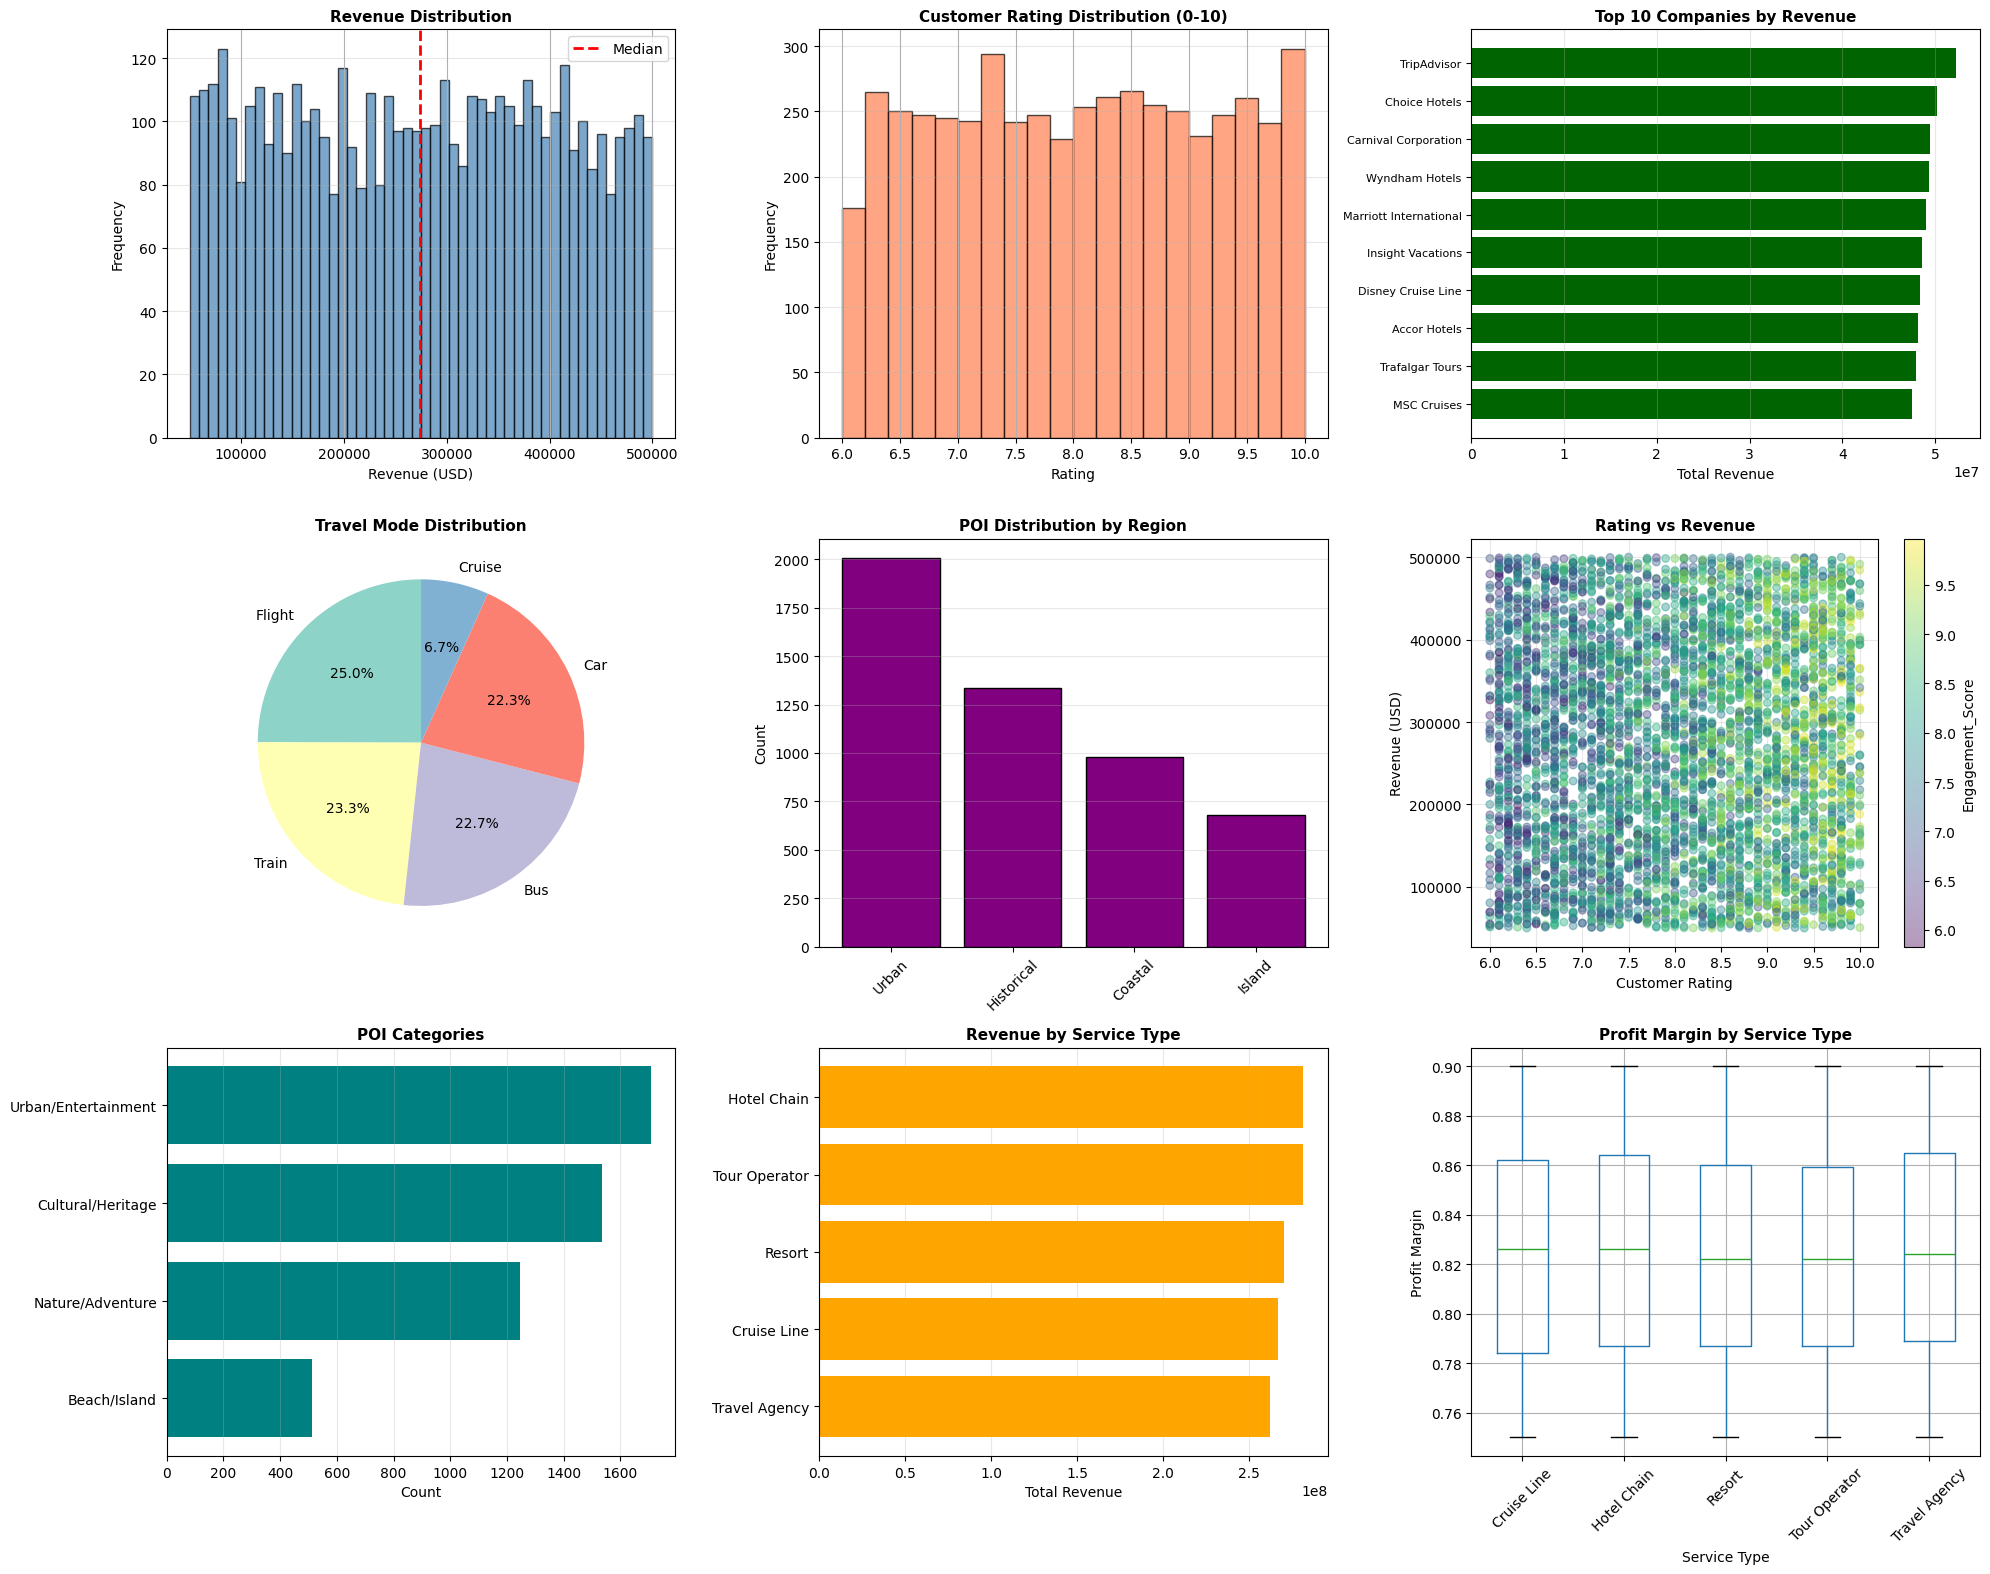

✅ Saved: outputs/01_EDA_Complete.png


In [15]:
# ============================================================================
# STEP 10: EXPLORATORY DATA ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("📊 STEP 10: EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\n📈 Descriptive Statistics:")
desc_cols = [col for col in ['Avg_Customer_Rating', 'Revenue(USD)', 'Engagement_Score',
                               'Customer_Retention', 'Profit_Margin'] if col in df.columns]
if desc_cols:
    print(df[desc_cols].describe().round(2).to_string())

print("\n🔗 Key Correlations:")
corr_cols = [col for col in ['Avg_Customer_Rating', 'Revenue(USD)', 'Engagement_Score',
                               'Customer_Retention', 'Digital_Channel_Share', 'Safety_Index']
             if col in df.columns]
if len(corr_cols) >= 2:
    corr_matrix = df[corr_cols].corr()
    print(corr_matrix.round(3).to_string())

# Create comprehensive EDA visualizations
print("\n📊 Creating EDA visualizations...")

fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.suptitle('EXPLORATORY DATA ANALYSIS - Tourism Dataset', fontsize=16, fontweight='bold', y=0.995)

# Plot 1: Revenue Distribution
if 'Revenue(USD)' in df.columns:
    df['Revenue(USD)'].hist(bins=50, ax=axes[0, 0], color='steelblue', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(df['Revenue(USD)'].median(), color='red', linestyle='--', linewidth=2, label='Median')
    axes[0, 0].set_title('Revenue Distribution', fontweight='bold', fontsize=11)
    axes[0, 0].set_xlabel('Revenue (USD)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Rating Distribution
if 'Avg_Customer_Rating' in df.columns:
    df['Avg_Customer_Rating'].hist(bins=20, ax=axes[0, 1], color='coral', edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Customer Rating Distribution (0-10)', fontweight='bold', fontsize=11)
    axes[0, 1].set_xlabel('Rating')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Top Companies by Revenue
if 'Company_Name' in df.columns and 'Revenue(USD)' in df.columns:
    top_companies = df.groupby('Company_Name')['Revenue(USD)'].sum().nlargest(10).sort_values()
    axes[0, 2].barh(range(len(top_companies)), top_companies.values, color='darkgreen')
    axes[0, 2].set_yticks(range(len(top_companies)))
    axes[0, 2].set_yticklabels(top_companies.index, fontsize=8)
    axes[0, 2].set_title('Top 10 Companies by Revenue', fontweight='bold', fontsize=11)
    axes[0, 2].set_xlabel('Total Revenue')
    axes[0, 2].grid(axis='x', alpha=0.3)

# Plot 4: Travel Mode Distribution
if 'Travel_mode' in df.columns:
    travel_dist = df['Travel_mode'].value_counts()
    axes[1, 0].pie(travel_dist.values, labels=travel_dist.index, autopct='%1.1f%%',
                   startangle=90, colors=plt.cm.Set3(range(len(travel_dist))))
    axes[1, 0].set_title('Travel Mode Distribution', fontweight='bold', fontsize=11)

# Plot 5: POI by Region
if 'Region_type' in df.columns:
    region_dist = df['Region_type'].value_counts()
    axes[1, 1].bar(region_dist.index, region_dist.values, color='purple', edgecolor='black')
    axes[1, 1].set_title('POI Distribution by Region', fontweight='bold', fontsize=11)
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(axis='y', alpha=0.3)

# Plot 6: Rating vs Revenue
if 'Avg_Customer_Rating' in df.columns and 'Revenue(USD)' in df.columns:
    color_col = 'Engagement_Score' if 'Engagement_Score' in df.columns else 'Avg_Customer_Rating'
    scatter = axes[1, 2].scatter(df['Avg_Customer_Rating'], df['Revenue(USD)'],
                                  alpha=0.4, c=df[color_col], cmap='viridis', s=30)
    axes[1, 2].set_xlabel('Customer Rating')
    axes[1, 2].set_ylabel('Revenue (USD)')
    axes[1, 2].set_title('Rating vs Revenue', fontweight='bold', fontsize=11)
    axes[1, 2].grid(alpha=0.3)
    plt.colorbar(scatter, ax=axes[1, 2], label=color_col)

# Plot 7: POI Categories
if 'POI_Category' in df.columns:
    poi_dist = df['POI_Category'].value_counts().sort_values()
    axes[2, 0].barh(poi_dist.index, poi_dist.values, color='teal')
    axes[2, 0].set_title('POI Categories', fontweight='bold', fontsize=11)
    axes[2, 0].set_xlabel('Count')
    axes[2, 0].grid(axis='x', alpha=0.3)

# Plot 8: Revenue by Service Type
if 'Service_Type' in df.columns and 'Revenue(USD)' in df.columns:
    service_rev = df.groupby('Service_Type')['Revenue(USD)'].sum().sort_values()
    axes[2, 1].barh(service_rev.index, service_rev.values, color='orange')
    axes[2, 1].set_title('Revenue by Service Type', fontweight='bold', fontsize=11)
    axes[2, 1].set_xlabel('Total Revenue')
    axes[2, 1].grid(axis='x', alpha=0.3)

# Plot 9: Profit Margin by Service Type
if 'Service_Type' in df.columns and 'Profit_Margin' in df.columns:
    df.boxplot(column='Profit_Margin', by='Service_Type', ax=axes[2, 2])
    axes[2, 2].set_title('Profit Margin by Service Type', fontweight='bold', fontsize=11)
    axes[2, 2].set_xlabel('Service Type')
    axes[2, 2].set_ylabel('Profit Margin')
    axes[2, 2].tick_params(axis='x', rotation=45)
    plt.suptitle('')

plt.tight_layout()
plt.savefig('outputs/01_EDA_Complete.png', dpi=300, bbox_inches='tight')
plt.close()

print("✅ Saved: outputs/01_EDA_Complete.png")

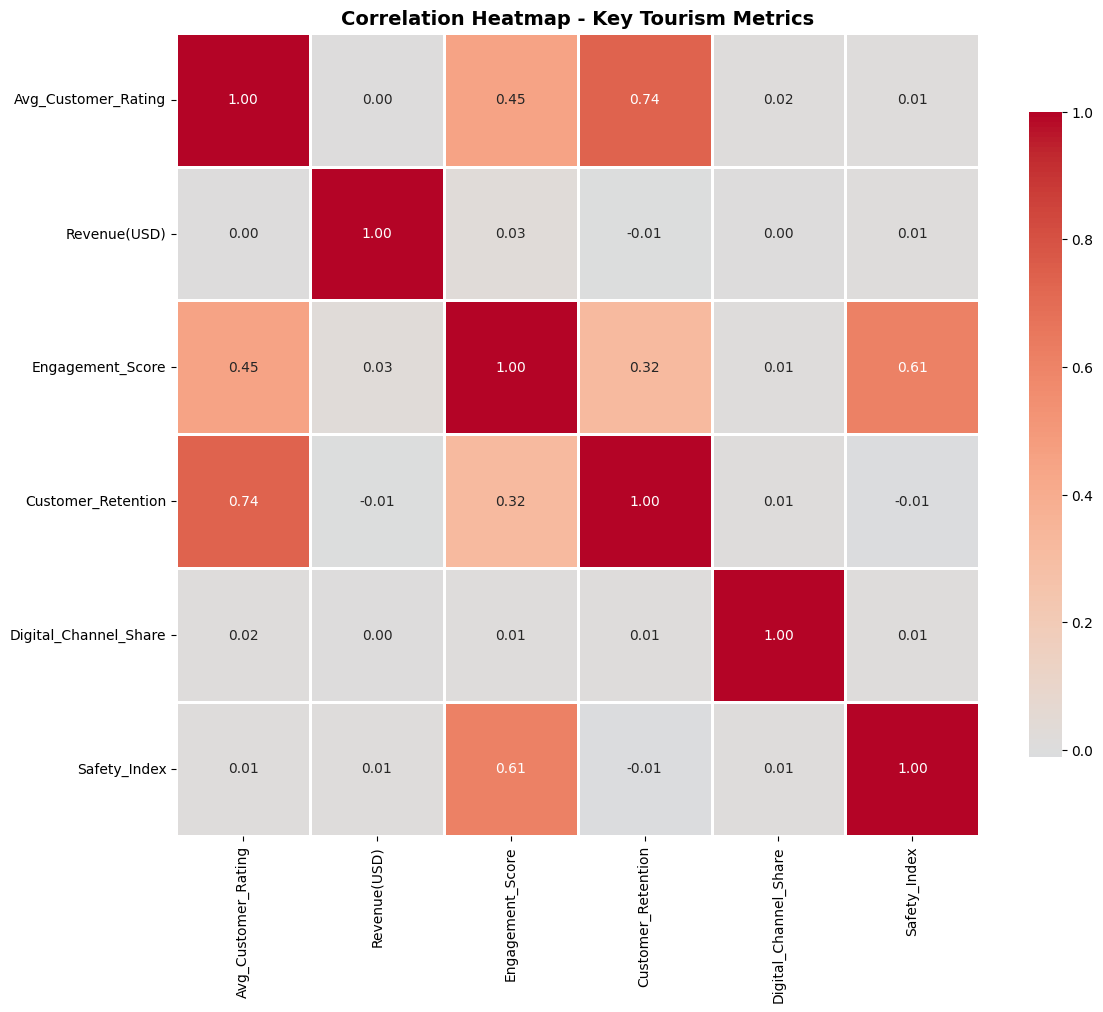

✅ Saved: outputs/02_Correlation_Matrix.png


In [16]:
# Correlation Heatmap
if len(corr_cols) >= 3:
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap - Key Tourism Metrics', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('outputs/02_Correlation_Matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    print("✅ Saved: outputs/02_Correlation_Matrix.png")

In [17]:
!pip install wordcloud -q

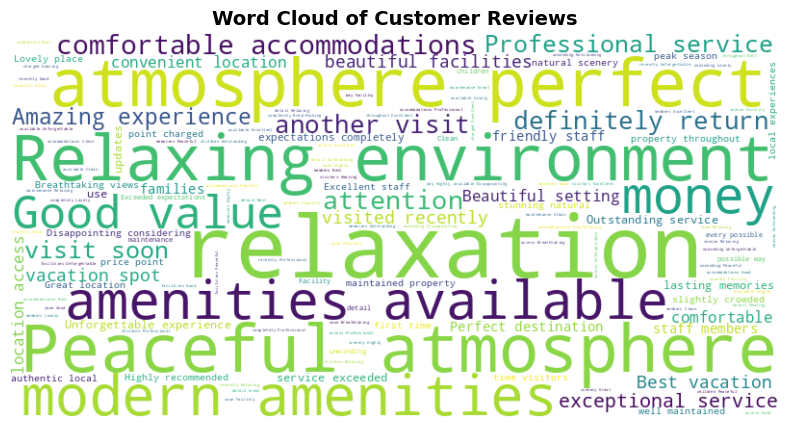

✅ Generated Word Cloud from Reviews


In [19]:
from wordcloud import WordCloud


# Combine all reviews into a single string
all_reviews = " ".join(df['Reviews'].dropna().astype(str).tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Reviews', fontsize=14, fontweight='bold')
plt.savefig('outputs/01.1_Correlation_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()


print("✅ Generated Word Cloud from Reviews")


🤖 STEP 11: MACHINE LEARNING MODELS

📊 MODEL 1: Revenue Prediction (Random Forest Regression)

📋 Training dataset: 5,000 samples
   Features: 6
   Training set: 4,000
   Test set: 1,000

🔄 Training Random Forest model...

🎯 Model Performance:
   R² Score: 0.7916
   RMSE: $59,224.99
   MAE: $47,483.84
   MAPE: 19.59%

📊 Feature Importance (Top 5):
   Marketing_Expenditure_USD           0.8939
   Total_Customers_To_POI              0.0276
   Digital_Channel_Share               0.0217
   Safety_Index                        0.0198
   Customer_Retention                  0.0192


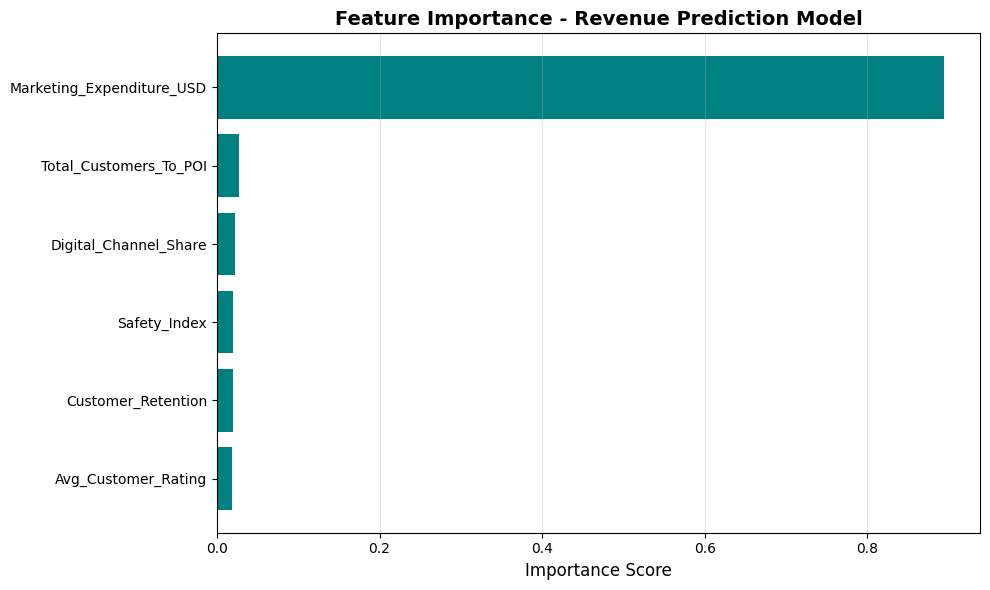


✅ Saved: outputs/03_Feature_Importance.png


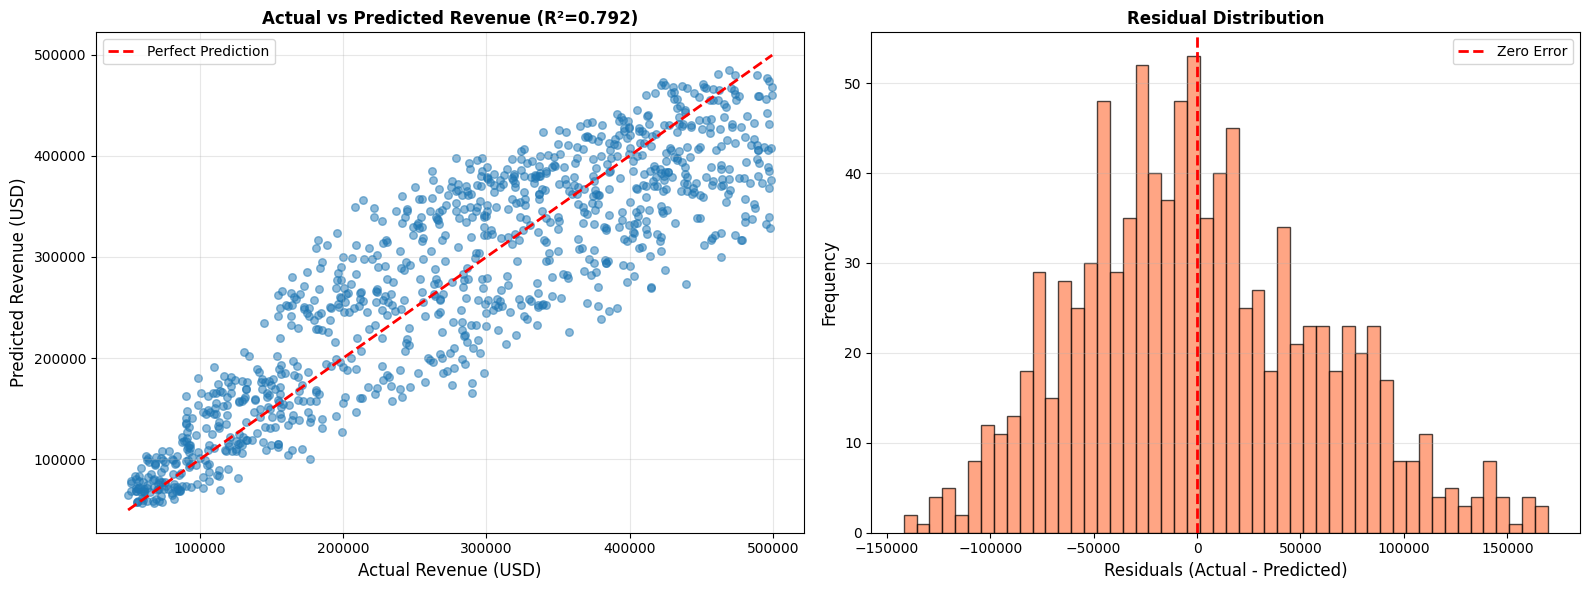

✅ Saved: outputs/04_Model_Performance.png


In [21]:
# ============================================================================
# STEP 11: MACHINE LEARNING - REVENUE PREDICTION
# ============================================================================
print("\n" + "="*80)
print("🤖 STEP 11: MACHINE LEARNING MODELS")
print("="*80)

print("\n📊 MODEL 1: Revenue Prediction (Random Forest Regression)")

# Select features for revenue prediction
features_revenue = [
    'Avg_Customer_Rating', 'Total_Customers_To_POI', 'Digital_Channel_Share',
    'Customer_Retention', 'Marketing_Expenditure_USD', 'Safety_Index',
    'Visitor_Volume', 'Overall_Accessibility'
]

# Filter available features
features_revenue = [f for f in features_revenue if f in df.columns]
target_revenue = 'Revenue(USD)'

if target_revenue in df.columns and len(features_revenue) >= 3:
    # Prepare data
    df_ml = df[features_revenue + [target_revenue]].dropna()
    X_reg = df_ml[features_revenue]
    y_reg = df_ml[target_revenue]

    print(f"\n📋 Training dataset: {len(df_ml):,} samples")
    print(f"   Features: {len(features_revenue)}")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_reg, y_reg, test_size=0.2, random_state=42
    )

    print(f"   Training set: {len(X_train):,}")
    print(f"   Test set: {len(X_test):,}")

    # Train model
    print("\n🔄 Training Random Forest model...")
    rf_reg = RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        random_state=42,
        n_jobs=-1
    )
    rf_reg.fit(X_train, y_train)

    # Predictions
    y_pred = rf_reg.predict(X_test)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = np.mean(np.abs(y_test - y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f"\n🎯 Model Performance:")
    print(f"   R² Score: {r2:.4f}")
    print(f"   RMSE: ${rmse:,.2f}")
    print(f"   MAE: ${mae:,.2f}")
    print(f"   MAPE: {mape:.2f}%")

    # Feature importance
    feat_importance = pd.DataFrame({
        'Feature': features_revenue,
        'Importance': rf_reg.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(f"\n📊 Feature Importance (Top 5):")
    for idx, row in feat_importance.head().iterrows():
        print(f"   {row['Feature']:35s} {row['Importance']:.4f}")

    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feat_importance['Feature'], feat_importance['Importance'], color='teal')
    plt.xlabel('Importance Score', fontsize=12)
    plt.title('Feature Importance - Revenue Prediction Model', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('outputs/03_Feature_Importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    print("\n✅ Saved: outputs/03_Feature_Importance.png")

    # Model performance visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Actual vs Predicted
    axes[0].scatter(y_test, y_pred, alpha=0.5, s=30)
    axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                 'r--', lw=2, label='Perfect Prediction')
    axes[0].set_xlabel('Actual Revenue (USD)', fontsize=12)
    axes[0].set_ylabel('Predicted Revenue (USD)', fontsize=12)
    axes[0].set_title(f'Actual vs Predicted Revenue (R²={r2:.3f})', fontsize=12, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # Residuals
    residuals = y_test - y_pred
    axes[1].hist(residuals, bins=50, color='coral', edgecolor='black', alpha=0.7)
    axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error')
    axes[1].set_xlabel('Residuals (Actual - Predicted)', fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)
    axes[1].set_title('Residual Distribution', fontsize=12, fontweight='bold')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('outputs/04_Model_Performance.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    print("✅ Saved: outputs/04_Model_Performance.png")

else:
    print("\n⚠️  Skipping revenue prediction - missing required columns")
    r2 = 0



📊 STEP 12: CUSTOMER SEGMENTATION (K-Means Clustering)

📋 Clustering dataset: 5,000 samples
   Features: ['Engagement_Score', 'Family_Score', 'Avg_spend_per_head', 'Safety_Index']

🔍 Finding optimal number of clusters...

🎯 Optimal Clusters: 2
   Silhouette Score: 0.346

📊 Cluster Profiles:
         Engagement_Score  Family_Score  Avg_spend_per_head  Safety_Index
Cluster                                                                  
0.0                  8.65          7.16              448.72          7.46
1.0                  7.39          5.33              449.13          5.44

📈 Cluster Sizes:
   Cluster 0: 2,445 samples (48.9%)
   Cluster 1: 2,555 samples (51.1%)


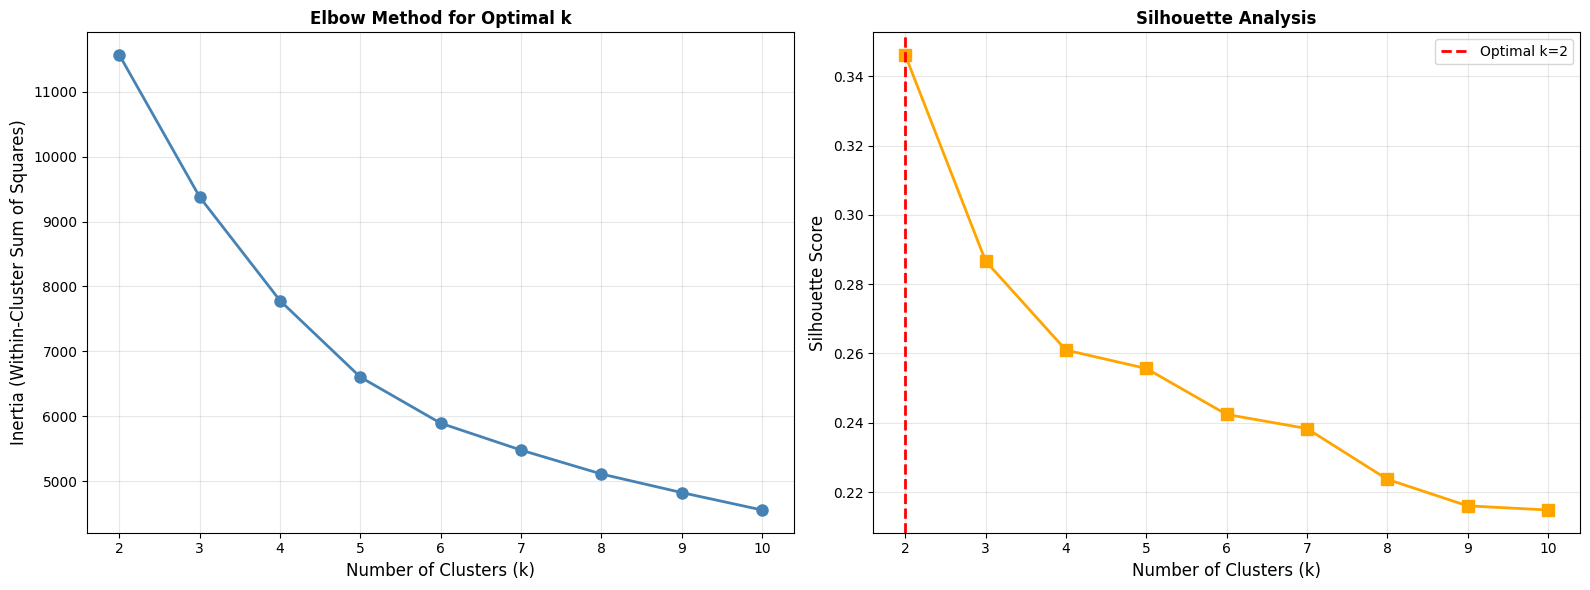


✅ Saved: outputs/05_Clustering_Analysis.png


In [23]:
# ============================================================================
# STEP 12: CUSTOMER SEGMENTATION (K-MEANS CLUSTERING)
# ============================================================================
print("\n" + "="*80)
print("📊 STEP 12: CUSTOMER SEGMENTATION (K-Means Clustering)")
print("="*80)

cluster_features = [
    'Engagement_Score', 'Overall_Accessibility', 'Family_Score',
    'Avg_spend_per_head', 'Safety_Index'
]

# Filter available features
cluster_features = [f for f in cluster_features if f in df.columns]

if len(cluster_features) >= 3:
    df_cluster = df[cluster_features].dropna()

    print(f"\n📋 Clustering dataset: {len(df_cluster):,} samples")
    print(f"   Features: {cluster_features}")

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_cluster)

    # Determine optimal number of clusters
    print("\n🔍 Finding optimal number of clusters...")
    inertias = []
    silhouettes = []
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))

    optimal_k = silhouettes.index(max(silhouettes)) + 2
    optimal_silhouette = max(silhouettes)

    print(f"\n🎯 Optimal Clusters: {optimal_k}")
    print(f"   Silhouette Score: {optimal_silhouette:.3f}")

    # Final clustering
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans_final.fit_predict(X_scaled)

    # Add cluster labels to original dataframe
    df.loc[df_cluster.index, 'Cluster'] = cluster_labels

    # Cluster profiles
    cluster_profiles = df.groupby('Cluster')[cluster_features].mean()

    print(f"\n📊 Cluster Profiles:")
    print(cluster_profiles.round(2).to_string())

    # Cluster sizes
    cluster_sizes = df['Cluster'].value_counts().sort_index()
    print(f"\n📈 Cluster Sizes:")
    for cluster, size in cluster_sizes.items():
        pct = (size / len(df_cluster)) * 100
        print(f"   Cluster {int(cluster)}: {size:,} samples ({pct:.1f}%)")

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Elbow curve
    axes[0].plot(k_range, inertias, marker='o', linewidth=2, markersize=8, color='steelblue')
    axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
    axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
    axes[0].set_title('Elbow Method for Optimal k', fontsize=12, fontweight='bold')
    axes[0].grid(alpha=0.3)

    # Silhouette scores
    axes[1].plot(k_range, silhouettes, marker='s', linewidth=2, markersize=8, color='orange')
    axes[1].axvline(optimal_k, color='red', linestyle='--', linewidth=2,
                    label=f'Optimal k={optimal_k}')
    axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
    axes[1].set_ylabel('Silhouette Score', fontsize=12)
    axes[1].set_title('Silhouette Analysis', fontsize=12, fontweight='bold')
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('outputs/05_Clustering_Analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    print("\n✅ Saved: outputs/05_Clustering_Analysis.png")

else:
    print("\n⚠️  Skipping clustering - missing required features")
    optimal_k = 0

In [24]:
# ============================================================================
# STEP 13: HIGH PERFORMER CLASSIFICATION
# ============================================================================
print("\n" + "="*80)
print("📊 STEP 13: HIGH PERFORMER CLASSIFICATION")
print("="*80)

if 'Engagement_Score' in df.columns:
    # Define high performers (top 25%)
    threshold = df['Engagement_Score'].quantile(0.75)
    df['High_Performer'] = (df['Engagement_Score'] >= threshold).astype(int)

    print(f"\n📊 High Performer Definition:")
    print(f"   Engagement Score >= {threshold:.2f}")
    print(f"   High Performers: {df['High_Performer'].sum():,} ({df['High_Performer'].mean()*100:.1f}%)")

    # Features for classification
    features_class = [
        'Avg_Customer_Rating', 'Digital_Channel_Share', 'Customer_Retention',
        'Overall_Accessibility', 'Safety_Index', 'Marketing_ROI'
    ]

    features_class = [f for f in features_class if f in df.columns]

    if len(features_class) >= 3:
        df_class = df[features_class + ['High_Performer']].dropna()
        X_class = df_class[features_class]
        y_class = df_class['High_Performer']

        print(f"\n📋 Classification dataset: {len(df_class):,} samples")

        # Split with stratification
        X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
            X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
        )

        # Train classifier
        print("\n🔄 Training Random Forest Classifier...")
        rf_class = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=42,
            n_jobs=-1
        )
        rf_class.fit(X_train_c, y_train_c)

        # Predictions
        y_pred_c = rf_class.predict(X_test_c)

        # Metrics
        accuracy = (y_pred_c == y_test_c).mean()

        print(f"\n🎯 Classification Results:")
        print(f"   Accuracy: {accuracy:.2%}")
        print(f"\n{classification_report(y_test_c, y_pred_c, target_names=['Normal', 'High Performer'])}")
    else:
        print("\n⚠️  Skipping classification - missing features")
        accuracy = 0
else:
    print("\n⚠️  Skipping classification - Engagement_Score not available")
    accuracy = 0


📊 STEP 13: HIGH PERFORMER CLASSIFICATION

📊 High Performer Definition:
   Engagement Score >= 8.67
   High Performers: 1,282 (25.6%)

📋 Classification dataset: 5,000 samples

🔄 Training Random Forest Classifier...

🎯 Classification Results:
   Accuracy: 82.00%

                precision    recall  f1-score   support

        Normal       0.84      0.94      0.89       744
High Performer       0.72      0.48      0.58       256

      accuracy                           0.82      1000
     macro avg       0.78      0.71      0.73      1000
  weighted avg       0.81      0.82      0.81      1000



In [26]:
# ============================================================================
# STEP 14: ADVANCED ML MODELS - COMPREHENSIVE COMPARISON
# ============================================================================

print("🚀 STEP 14: ADVANCED ML MODELS - MODEL COMPARISON")

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

🚀 STEP 14: ADVANCED ML MODELS - MODEL COMPARISON


In [27]:
# ============================================================================
# SECTION A: REGRESSION MODELS COMPARISON (Revenue Prediction)
# ============================================================================
print("\n" + "="*80)
print("📊 SECTION A: REGRESSION MODELS - Revenue Prediction")
print("="*80)

if target_revenue in df.columns and len(features_revenue) >= 3:
    print(f"\n🔄 Training {10} different regression models...")

    # Define models
    regression_models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1),
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0, random_state=42),
        'Lasso Regression': Lasso(alpha=1.0, random_state=42),
        'ElasticNet': ElasticNet(alpha=1.0, random_state=42),
        'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
        'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
        'KNN': KNeighborsRegressor(n_neighbors=5)
    }

    # Train and evaluate all models
    regression_results = []

    for name, model in regression_models.items():
        print(f"   Training {name}...", end=' ')

        try:
            # Train
            model.fit(X_train, y_train)

            # Predict
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)

            # Calculate metrics
            r2_train = r2_score(y_train, y_pred_train)
            r2_test = r2_score(y_test, y_pred_test)
            rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            mae_train = np.mean(np.abs(y_train - y_pred_train))
            mae_test = np.mean(np.abs(y_test - y_pred_test))

            # Store results
            regression_results.append({
                'Model': name,
                'R²_Train': r2_train,
                'R²_Test': r2_test,
                'RMSE_Train': rmse_train,
                'RMSE_Test': rmse_test,
                'MAE_Train': mae_train,
                'MAE_Test': mae_test,
                'Overfit': r2_train - r2_test
            })

            print(f"✓ R²={r2_test:.4f}, RMSE=${rmse_test:,.0f}")

        except Exception as e:
            print(f"✗ Error: {str(e)[:50]}")

    # Create comparison DataFrame
    df_reg_results = pd.DataFrame(regression_results).sort_values('R²_Test', ascending=False)

    print(f"\n📊 REGRESSION MODELS COMPARISON:")
    print("="*100)
    print(f"{'Model':<20} {'R²_Train':<12} {'R²_Test':<12} {'RMSE_Test':<15} {'MAE_Test':<15} {'Overfit':<10}")
    print("-"*100)
    for _, row in df_reg_results.iterrows():
        print(f"{row['Model']:<20} {row['R²_Train']:<12.4f} {row['R²_Test']:<12.4f} "
              f"${row['RMSE_Test']:<14,.0f} ${row['MAE_Test']:<14,.0f} {row['Overfit']:<10.4f}")
    print("="*100)

    # Best model
    best_reg_model = df_reg_results.iloc[0]
    print(f"\n🏆 BEST REGRESSION MODEL: {best_reg_model['Model']}")
    print(f"   R² Score: {best_reg_model['R²_Test']:.4f}")
    print(f"   RMSE: ${best_reg_model['RMSE_Test']:,.2f}")
    print(f"   MAE: ${best_reg_model['MAE_Test']:,.2f}")

    # Visualization - Model Comparison
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # R² Comparison
    axes[0, 0].barh(df_reg_results['Model'], df_reg_results['R²_Test'], color='steelblue')
    axes[0, 0].set_xlabel('R² Score (Test)', fontsize=11)
    axes[0, 0].set_title('Model Comparison - R² Score', fontsize=12, fontweight='bold')
    axes[0, 0].grid(axis='x', alpha=0.3)
    axes[0, 0].invert_yaxis()

    # RMSE Comparison
    axes[0, 1].barh(df_reg_results['Model'], df_reg_results['RMSE_Test'], color='coral')
    axes[0, 1].set_xlabel('RMSE (Test)', fontsize=11)
    axes[0, 1].set_title('Model Comparison - RMSE (Lower is Better)', fontsize=12, fontweight='bold')
    axes[0, 1].grid(axis='x', alpha=0.3)
    axes[0, 1].invert_yaxis()

    # Train vs Test R²
    x_pos = np.arange(len(df_reg_results))
    width = 0.35
    axes[1, 0].bar(x_pos - width/2, df_reg_results['R²_Train'], width, label='Train', color='lightgreen')
    axes[1, 0].bar(x_pos + width/2, df_reg_results['R²_Test'], width, label='Test', color='darkgreen')
    axes[1, 0].set_xticks(x_pos)
    axes[1, 0].set_xticklabels(df_reg_results['Model'], rotation=45, ha='right', fontsize=9)
    axes[1, 0].set_ylabel('R² Score', fontsize=11)
    axes[1, 0].set_title('Train vs Test Performance', fontsize=12, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(axis='y', alpha=0.3)

    # Overfitting Analysis
    colors_overfit = ['red' if x > 0.1 else 'green' for x in df_reg_results['Overfit']]
    axes[1, 1].barh(df_reg_results['Model'], df_reg_results['Overfit'], color=colors_overfit)
    axes[1, 1].axvline(0.1, color='red', linestyle='--', label='Overfit Threshold')
    axes[1, 1].set_xlabel('Overfit Score (Train R² - Test R²)', fontsize=11)
    axes[1, 1].set_title('Overfitting Analysis', fontsize=12, fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(axis='x', alpha=0.3)
    axes[1, 1].invert_yaxis()

    plt.tight_layout()
    plt.savefig('outputs/06_Regression_Model_Comparison.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("\n✅ Saved: outputs/06_Regression_Model_Comparison.png")

    # Save results
    df_reg_results.to_csv('outputs/REGRESSION_MODEL_RESULTS.csv', index=False)
    print("✅ Saved: outputs/REGRESSION_MODEL_RESULTS.csv")

else:
    print("\n⚠️  Skipping regression comparison - missing required columns")


📊 SECTION A: REGRESSION MODELS - Revenue Prediction

🔄 Training 10 different regression models...
   Training Random Forest... ✓ R²=0.7904, RMSE=$59,394
   Training Gradient Boosting... ✓ R²=0.7883, RMSE=$59,695
   Training XGBoost... ✓ R²=0.7702, RMSE=$62,194
   Training Linear Regression... ✓ R²=0.7390, RMSE=$66,278
   Training Ridge Regression... ✓ R²=0.7390, RMSE=$66,278
   Training Lasso Regression... ✓ R²=0.7390, RMSE=$66,278
   Training ElasticNet... ✓ R²=0.7390, RMSE=$66,279
   Training Decision Tree... ✓ R²=0.7306, RMSE=$67,335
   Training AdaBoost... ✓ R²=0.7963, RMSE=$58,548
   Training KNN... ✓ R²=0.5134, RMSE=$90,496

📊 REGRESSION MODELS COMPARISON:
Model                R²_Train     R²_Test      RMSE_Test       MAE_Test        Overfit   
----------------------------------------------------------------------------------------------------
AdaBoost             0.8069       0.7963       $58,548         $47,269         0.0105    
Random Forest        0.9556       0.7904       

In [28]:
# ============================================================================
# SECTION B: CLASSIFICATION MODELS COMPARISON (High Performer Prediction)
# ============================================================================
print("\n" + "="*80)
print("📊 SECTION B: CLASSIFICATION MODELS - High Performer Prediction")
print("="*80)

if 'High_Performer' in df.columns and len(features_class) >= 3:
    print(f"\n🔄 Training {12} different classification models...")

    # Define models
    classification_models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),
        'XGBoost': XGBClassifier(n_estimators=100, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
        'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB(),
        'SVC (Linear)': SVC(kernel='linear', random_state=42),
        'SVC (RBF)': SVC(kernel='rbf', random_state=42),
        'Ridge Classifier': LogisticRegression(penalty='l2', max_iter=1000, random_state=42),
        'Lasso Classifier': LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
    }

    # Train and evaluate all models
    classification_results = []

    for name, model in classification_models.items():
        print(f"   Training {name}...", end=' ')

        try:
            # Train
            model.fit(X_train_c, y_train_c)

            # Predict
            y_pred_train_c = model.predict(X_train_c)
            y_pred_test_c = model.predict(X_test_c)

            # Calculate metrics
            acc_train = accuracy_score(y_train_c, y_pred_train_c)
            acc_test = accuracy_score(y_test_c, y_pred_test_c)
            precision = precision_score(y_test_c, y_pred_test_c, zero_division=0)
            recall = recall_score(y_test_c, y_pred_test_c, zero_division=0)
            f1 = f1_score(y_test_c, y_pred_test_c, zero_division=0)

            # Store results
            classification_results.append({
                'Model': name,
                'Accuracy_Train': acc_train,
                'Accuracy_Test': acc_test,
                'Precision': precision,
                'Recall': recall,
                'F1_Score': f1,
                'Overfit': acc_train - acc_test
            })

            print(f"✓ Acc={acc_test:.3f}, F1={f1:.3f}")

        except Exception as e:
            print(f"✗ Error: {str(e)[:50]}")

    # Create comparison DataFrame
    df_class_results = pd.DataFrame(classification_results).sort_values('F1_Score', ascending=False)

    print(f"\n📊 CLASSIFICATION MODELS COMPARISON:")
    print("="*110)
    print(f"{'Model':<22} {'Acc_Train':<12} {'Acc_Test':<12} {'Precision':<12} {'Recall':<12} {'F1_Score':<12} {'Overfit':<10}")
    print("-"*110)
    for _, row in df_class_results.iterrows():
        print(f"{row['Model']:<22} {row['Accuracy_Train']:<12.4f} {row['Accuracy_Test']:<12.4f} "
              f"{row['Precision']:<12.4f} {row['Recall']:<12.4f} {row['F1_Score']:<12.4f} {row['Overfit']:<10.4f}")
    print("="*110)

    # Best model
    best_class_model = df_class_results.iloc[0]
    print(f"\n🏆 BEST CLASSIFICATION MODEL: {best_class_model['Model']}")
    print(f"   Accuracy: {best_class_model['Accuracy_Test']:.4f} ({best_class_model['Accuracy_Test']*100:.2f}%)")
    print(f"   Precision: {best_class_model['Precision']:.4f}")
    print(f"   Recall: {best_class_model['Recall']:.4f}")
    print(f"   F1 Score: {best_class_model['F1_Score']:.4f}")

    # Visualization - Classification Comparison
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Accuracy Comparison
    axes[0, 0].barh(df_class_results['Model'], df_class_results['Accuracy_Test'], color='steelblue')
    axes[0, 0].set_xlabel('Accuracy (Test)', fontsize=11)
    axes[0, 0].set_title('Model Comparison - Accuracy', fontsize=12, fontweight='bold')
    axes[0, 0].grid(axis='x', alpha=0.3)
    axes[0, 0].invert_yaxis()

    # F1 Score Comparison
    axes[0, 1].barh(df_class_results['Model'], df_class_results['F1_Score'], color='coral')
    axes[0, 1].set_xlabel('F1 Score (Test)', fontsize=11)
    axes[0, 1].set_title('Model Comparison - F1 Score', fontsize=12, fontweight='bold')
    axes[0, 1].grid(axis='x', alpha=0.3)
    axes[0, 1].invert_yaxis()

    # Precision vs Recall
    axes[1, 0].scatter(df_class_results['Recall'], df_class_results['Precision'], s=100, alpha=0.6)
    for idx, row in df_class_results.iterrows():
        axes[1, 0].annotate(row['Model'], (row['Recall'], row['Precision']),
                           fontsize=7, ha='right')
    axes[1, 0].set_xlabel('Recall', fontsize=11)
    axes[1, 0].set_ylabel('Precision', fontsize=11)
    axes[1, 0].set_title('Precision-Recall Trade-off', fontsize=12, fontweight='bold')
    axes[1, 0].grid(alpha=0.3)

    # Comprehensive Metrics
    x_pos = np.arange(len(df_class_results))
    width = 0.25
    axes[1, 1].bar(x_pos - width, df_class_results['Accuracy_Test'], width, label='Accuracy', color='steelblue')
    axes[1, 1].bar(x_pos, df_class_results['Precision'], width, label='Precision', color='coral')
    axes[1, 1].bar(x_pos + width, df_class_results['Recall'], width, label='Recall', color='lightgreen')
    axes[1, 1].set_xticks(x_pos)
    axes[1, 1].set_xticklabels(df_class_results['Model'], rotation=45, ha='right', fontsize=8)
    axes[1, 1].set_ylabel('Score', fontsize=11)
    axes[1, 1].set_title('Comprehensive Performance Metrics', fontsize=12, fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('outputs/07_Classification_Model_Comparison.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("\n✅ Saved: outputs/07_Classification_Model_Comparison.png")

    # Save results
    df_class_results.to_csv('outputs/CLASSIFICATION_MODEL_RESULTS.csv', index=False)
    print("✅ Saved: outputs/CLASSIFICATION_MODEL_RESULTS.csv")

    # Update best accuracy for final report
    best_accuracy = best_class_model['Accuracy_Test']

else:
    print("\n⚠️  Skipping classification comparison - missing required data")
    best_accuracy = accuracy if 'accuracy' in locals() else 0


📊 SECTION B: CLASSIFICATION MODELS - High Performer Prediction

🔄 Training 12 different classification models...
   Training Random Forest... ✓ Acc=0.820, F1=0.577
   Training Gradient Boosting... ✓ Acc=0.812, F1=0.578
   Training XGBoost... ✓ Acc=0.805, F1=0.579
   Training Logistic Regression... ✓ Acc=0.823, F1=0.614
   Training Decision Tree... ✓ Acc=0.785, F1=0.553
   Training AdaBoost... ✓ Acc=0.816, F1=0.603
   Training KNN... ✓ Acc=0.795, F1=0.545
   Training Naive Bayes... ✓ Acc=0.812, F1=0.602
   Training SVC (Linear)... ✓ Acc=0.823, F1=0.595
   Training SVC (RBF)... ✓ Acc=0.816, F1=0.556
   Training Ridge Classifier... ✓ Acc=0.823, F1=0.614
   Training Lasso Classifier... ✓ Acc=0.823, F1=0.613

📊 CLASSIFICATION MODELS COMPARISON:
Model                  Acc_Train    Acc_Test     Precision    Recall       F1_Score     Overfit   
--------------------------------------------------------------------------------------------------------------
Logistic Regression    0.8257       0.8

In [29]:
# ============================================================================
# SECTION C: ADVANCED CLUSTERING COMPARISON
# ============================================================================
print("\n" + "="*80)
print("📊 SECTION C: CLUSTERING ALGORITHMS COMPARISON")
print("="*80)

from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

if len(cluster_features) >= 3:
    print(f"\n🔄 Testing multiple clustering algorithms...")

    clustering_results = []

    # 1. K-Means (already done, but let's test different k values)
    print("\n   Testing K-Means with different k values...")
    for k in [3, 4, 5, 6]:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_scaled)
        silhouette = silhouette_score(X_scaled, labels)
        inertia = kmeans.inertia_

        clustering_results.append({
            'Algorithm': f'K-Means (k={k})',
            'N_Clusters': k,
            'Silhouette': silhouette,
            'Inertia': inertia
        })
        print(f"      k={k}: Silhouette={silhouette:.3f}")

    # 2. Hierarchical Clustering
    print("\n   Testing Hierarchical Clustering...")
    for k in [3, 4, 5, 6]:
        hierarchical = AgglomerativeClustering(n_clusters=k)
        labels = hierarchical.fit_predict(X_scaled)
        silhouette = silhouette_score(X_scaled, labels)

        clustering_results.append({
            'Algorithm': f'Hierarchical (k={k})',
            'N_Clusters': k,
            'Silhouette': silhouette,
            'Inertia': np.nan
        })
        print(f"      k={k}: Silhouette={silhouette:.3f}")

    # 3. Gaussian Mixture Model
    print("\n   Testing Gaussian Mixture Model...")
    for k in [3, 4, 5, 6]:
        gmm = GaussianMixture(n_components=k, random_state=42)
        labels = gmm.fit_predict(X_scaled)
        silhouette = silhouette_score(X_scaled, labels)

        clustering_results.append({
            'Algorithm': f'GMM (k={k})',
            'N_Clusters': k,
            'Silhouette': silhouette,
            'Inertia': np.nan
        })
        print(f"      k={k}: Silhouette={silhouette:.3f}")

    # 4. DBSCAN
    print("\n   Testing DBSCAN...")
    for eps in [0.5, 1.0, 1.5]:
        dbscan = DBSCAN(eps=eps, min_samples=5)
        labels = dbscan.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            silhouette = silhouette_score(X_scaled, labels)
        else:
            silhouette = 0

        clustering_results.append({
            'Algorithm': f'DBSCAN (eps={eps})',
            'N_Clusters': n_clusters,
            'Silhouette': silhouette,
            'Inertia': np.nan
        })
        print(f"      eps={eps}: Clusters={n_clusters}, Silhouette={silhouette:.3f}")

    # Results DataFrame
    df_cluster_results = pd.DataFrame(clustering_results).sort_values('Silhouette', ascending=False)

    print(f"\n📊 CLUSTERING ALGORITHMS COMPARISON:")
    print("="*70)
    print(f"{'Algorithm':<30} {'N_Clusters':<15} {'Silhouette':<15}")
    print("-"*70)
    for _, row in df_cluster_results.iterrows():
        print(f"{row['Algorithm']:<30} {row['N_Clusters']:<15} {row['Silhouette']:<15.4f}")
    print("="*70)

    # Best clustering
    best_cluster = df_cluster_results.iloc[0]
    print(f"\n🏆 BEST CLUSTERING ALGORITHM: {best_cluster['Algorithm']}")
    print(f"   Silhouette Score: {best_cluster['Silhouette']:.4f}")
    print(f"   Number of Clusters: {best_cluster['N_Clusters']}")

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Silhouette comparison
    df_cluster_results_clean = df_cluster_results[df_cluster_results['Silhouette'] > 0]
    axes[0].barh(df_cluster_results_clean['Algorithm'], df_cluster_results_clean['Silhouette'],
                 color='steelblue')
    axes[0].set_xlabel('Silhouette Score', fontsize=11)
    axes[0].set_title('Clustering Algorithms - Silhouette Score', fontsize=12, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    axes[0].invert_yaxis()

    # Number of clusters distribution
    kmeans_only = df_cluster_results[df_cluster_results['Algorithm'].str.contains('K-Means')]
    axes[1].plot(kmeans_only['N_Clusters'], kmeans_only['Silhouette'],
                 marker='o', linewidth=2, markersize=8, color='coral', label='K-Means')

    hierarchical_only = df_cluster_results[df_cluster_results['Algorithm'].str.contains('Hierarchical')]
    axes[1].plot(hierarchical_only['N_Clusters'], hierarchical_only['Silhouette'],
                 marker='s', linewidth=2, markersize=8, color='green', label='Hierarchical')

    gmm_only = df_cluster_results[df_cluster_results['Algorithm'].str.contains('GMM')]
    axes[1].plot(gmm_only['N_Clusters'], gmm_only['Silhouette'],
                 marker='^', linewidth=2, markersize=8, color='purple', label='GMM')

    axes[1].set_xlabel('Number of Clusters', fontsize=11)
    axes[1].set_ylabel('Silhouette Score', fontsize=11)
    axes[1].set_title('Algorithm Performance by Cluster Count', fontsize=12, fontweight='bold')
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('outputs/08_Clustering_Algorithm_Comparison.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("\n✅ Saved: outputs/08_Clustering_Algorithm_Comparison.png")

    # Save results
    df_cluster_results.to_csv('outputs/CLUSTERING_ALGORITHM_RESULTS.csv', index=False)
    print("✅ Saved: outputs/CLUSTERING_ALGORITHM_RESULTS.csv")

else:
    print("\n⚠️  Skipping clustering comparison - missing required features")


📊 SECTION C: CLUSTERING ALGORITHMS COMPARISON

🔄 Testing multiple clustering algorithms...

   Testing K-Means with different k values...
      k=3: Silhouette=0.287
      k=4: Silhouette=0.261
      k=5: Silhouette=0.256
      k=6: Silhouette=0.242

   Testing Hierarchical Clustering...
      k=3: Silhouette=0.210
      k=4: Silhouette=0.193
      k=5: Silhouette=0.175
      k=6: Silhouette=0.157

   Testing Gaussian Mixture Model...
      k=3: Silhouette=0.246
      k=4: Silhouette=0.250
      k=5: Silhouette=0.246
      k=6: Silhouette=0.238

   Testing DBSCAN...
      eps=0.5: Clusters=1, Silhouette=0.000
      eps=1.0: Clusters=1, Silhouette=0.000
      eps=1.5: Clusters=1, Silhouette=0.000

📊 CLUSTERING ALGORITHMS COMPARISON:
Algorithm                      N_Clusters      Silhouette     
----------------------------------------------------------------------
K-Means (k=3)                  3               0.2867         
K-Means (k=4)                  4               0.2610       

In [34]:
# ============================================================================
# STEP 15: SAVE FINAL DATASETS
# ============================================================================
print("\n" + "="*80)
print("💾 STEP 15: SAVING FINAL DATASETS & COMPREHENSIVE REPORTS")
print("="*80)

# Save complete cleaned dataset
df.to_csv('outputs/FINAL_CLEANED_TOURISM_DATA.csv', index=False)
df.to_excel('outputs/FINAL_CLEANED_TOURISM_DATA.xlsx', index=False)

print(f"\n✅ Saved main dataset:")
print(f"   • outputs/FINAL_CLEANED_TOURISM_DATA.csv")
print(f"   • outputs/FINAL_CLEANED_TOURISM_DATA.xlsx")
print(f"   Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")


💾 STEP 15: SAVING FINAL DATASETS & COMPREHENSIVE REPORTS

✅ Saved main dataset:
   • outputs/FINAL_CLEANED_TOURISM_DATA.csv
   • outputs/FINAL_CLEANED_TOURISM_DATA.xlsx
   Shape: 5,000 rows × 61 columns
